# Weather

#### Problem Statement:

One of the aspects Seattle is most notable for, in addition to coffee, grunge, and electronic businesses, is its rains. From January 1, 1948 to December 12, 2017, this dataset provides full records of Seattle's daily rainfall patterns.

#### Data Dictionary

- Following are the variables with their definition and key:

DATE: The date of the observation

PRCP: The amount of precipitation, in inches

TMAX: The maximum temperature for that day, in degrees Fahrenheit

TMIN: The minimum temperature for that day, in degrees Fahrenheit

RAIN: TRUE if rain was observed on that day, FALSE if it was not

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [331]:
df = pd.read_csv("seattleWeather_1948-2017.csv", skipinitialspace= True)

# Because our data has spaces in front of values for "RAIN" column.

In [332]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [333]:
df.shape

(25551, 5)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [335]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


### Missing Value Treatment:

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [337]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [338]:
df.isna().sum() / len(df) * 100

DATE    0.000000
PRCP    0.011741
TMAX    0.000000
TMIN    0.000000
RAIN    0.011741
dtype: float64

In [339]:
# There are just 3 Missing Values for each of "PRCP" and "RAIN" columns.

In [340]:
# Let's Check if These Values are missing for same rows or different.

df[df["PRCP"].isna() == True]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [341]:
# As we can see, both "PRCP" and "RAIN" have Missing Values for Same Rows.

# We can Drop These 3 Roes as we have more than 25000 observations.

In [342]:
df = df.dropna()

In [343]:
df.isna().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [344]:
df.shape

(25548, 5)

### Data Cleaning:

In [345]:
# First, we will convert "DATE" column to DateTime object so as to convert "DATE" in Days, Months, Years.

# We can also see if "RAIN" has any Significant Relation With Days, Months or Years.

In [346]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [347]:
df.dtypes

DATE    datetime64[ns]
PRCP           float64
TMAX             int64
TMIN             int64
RAIN            object
dtype: object

In [348]:
df["DATE"]

0       1948-01-01
1       1948-01-02
2       1948-01-03
3       1948-01-04
4       1948-01-05
           ...    
25546   2017-12-10
25547   2017-12-11
25548   2017-12-12
25549   2017-12-13
25550   2017-12-14
Name: DATE, Length: 25548, dtype: datetime64[ns]

In [349]:
# We can Convert Date to Years, Months and Days and Store them in Different Columns.

df["YEAR"] = df["DATE"].dt.year

In [350]:
df["YEAR"]

0        1948
1        1948
2        1948
3        1948
4        1948
         ... 
25546    2017
25547    2017
25548    2017
25549    2017
25550    2017
Name: YEAR, Length: 25548, dtype: int64

In [351]:
df["MONTH"] = df["DATE"].dt.month

In [352]:
df["DAY"] = df["DATE"].dt.day

In [353]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,1948-01-01,0.47,51,42,True,1948,1,1
1,1948-01-02,0.59,45,36,True,1948,1,2
2,1948-01-03,0.42,45,35,True,1948,1,3
3,1948-01-04,0.31,45,34,True,1948,1,4
4,1948-01-05,0.17,45,32,True,1948,1,5


In [354]:
# We can NoW Drop "DATE" column

df = df.drop("DATE", axis= 1)

In [355]:
df.head()

,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,0.47,51,42,True,1948,1,1
1,0.59,45,36,True,1948,1,2
2,0.42,45,35,True,1948,1,3
3,0.31,45,34,True,1948,1,4
4,0.17,45,32,True,1948,1,5


In [356]:
# Encoding "RAIN" column so that we can check for correlation of features with target.

df["RAIN"] = df["RAIN"].map({True : 1, False : 0})

# We had to use True and Flase as boolean insted of strings because pandas automatically converted data in "RAIN" in Boolean
# while reading the file.

In [357]:
df.dtypes

PRCP     float64
TMAX       int64
TMIN       int64
RAIN       int64
YEAR       int64
MONTH      int64
DAY        int64
dtype: object

In [358]:
df.head()

,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,0.47,51,42,1,1948,1,1
1,0.59,45,36,1,1948,1,2
2,0.42,45,35,1,1948,1,3
3,0.31,45,34,1,1948,1,4
4,0.17,45,32,1,1948,1,5


### EDA:

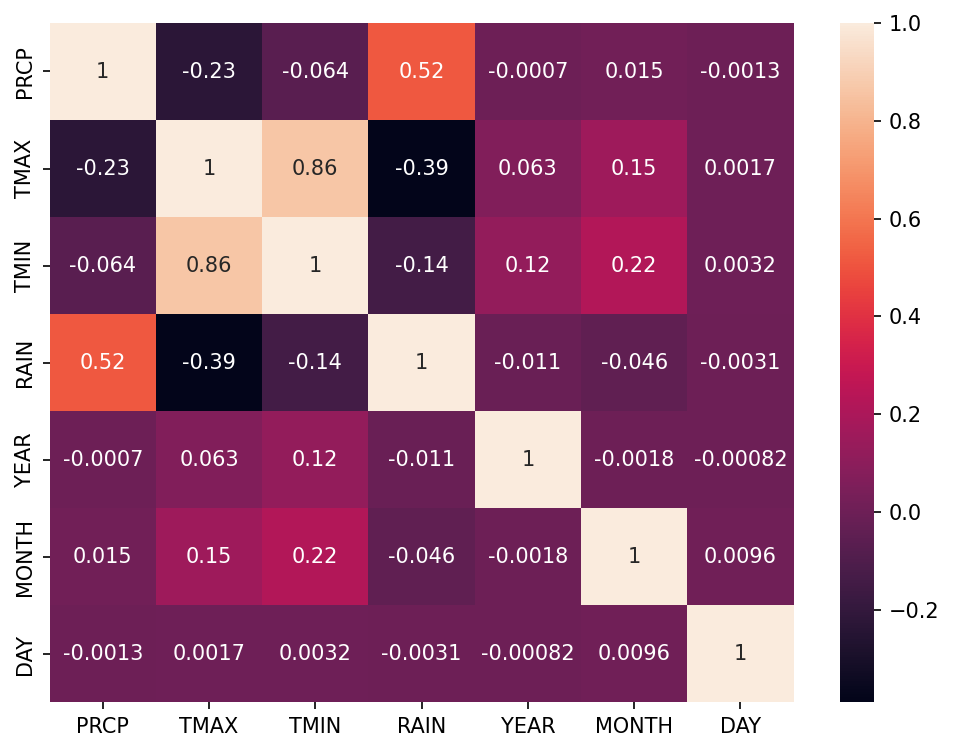

In [359]:
# Correlation Between Features and Target:

plt.figure(figsize= (8,6), dpi= 150)

sns.heatmap(df.corr(), annot= True)

plt.show()

In [360]:
# "RAIN" has high Positive Correlation with "PRCP".

# "TMAX" and "TMIN" are Highly Positively Correlated.

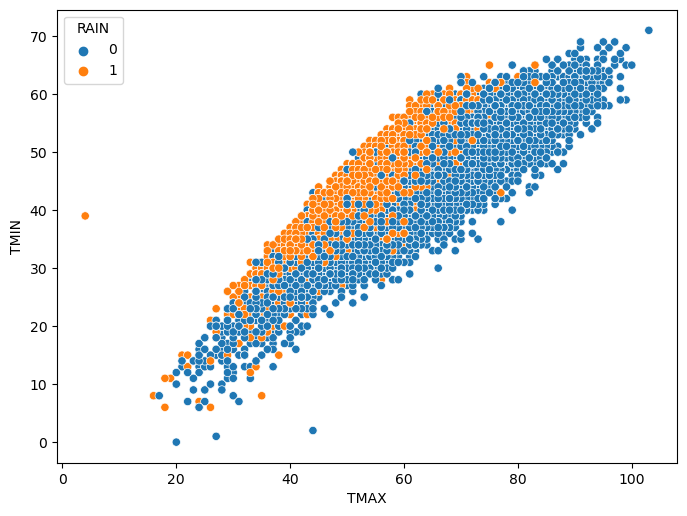

In [361]:
# Relationship Between "TMAX" and "TMIN":

plt.figure(figsize= (8,6), dpi= 100)

sns.scatterplot(data= df, x= "TMAX", y= "TMIN", hue = "RAIN")

plt.show()

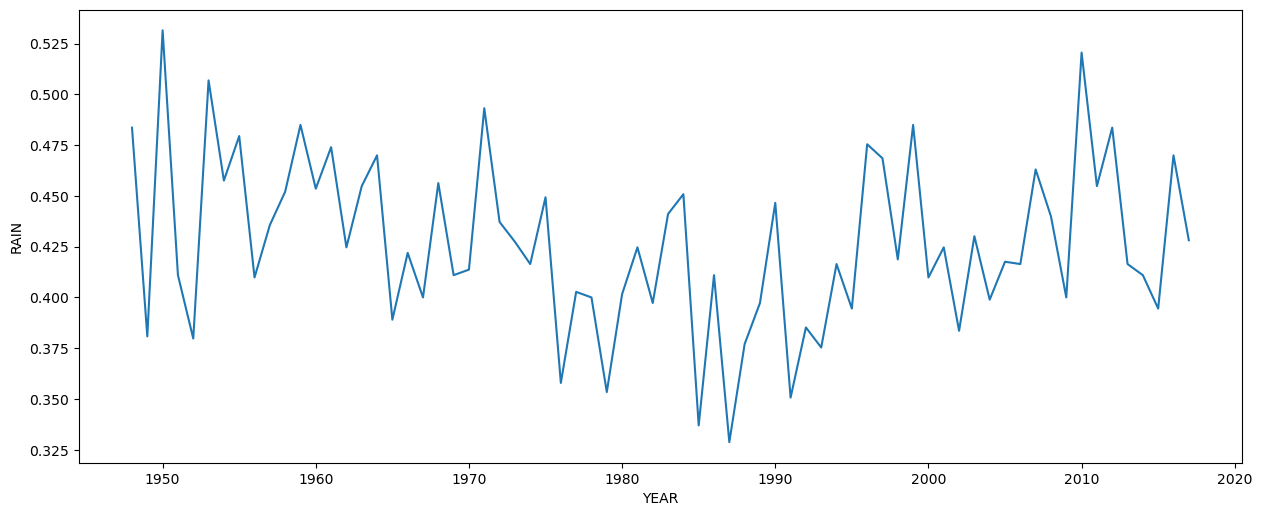

In [362]:
# Year Wise Rain:

plt.figure(figsize= (15,6), dpi= 100)

sns.lineplot(data= df.groupby("YEAR").mean()["RAIN"])

plt.show()

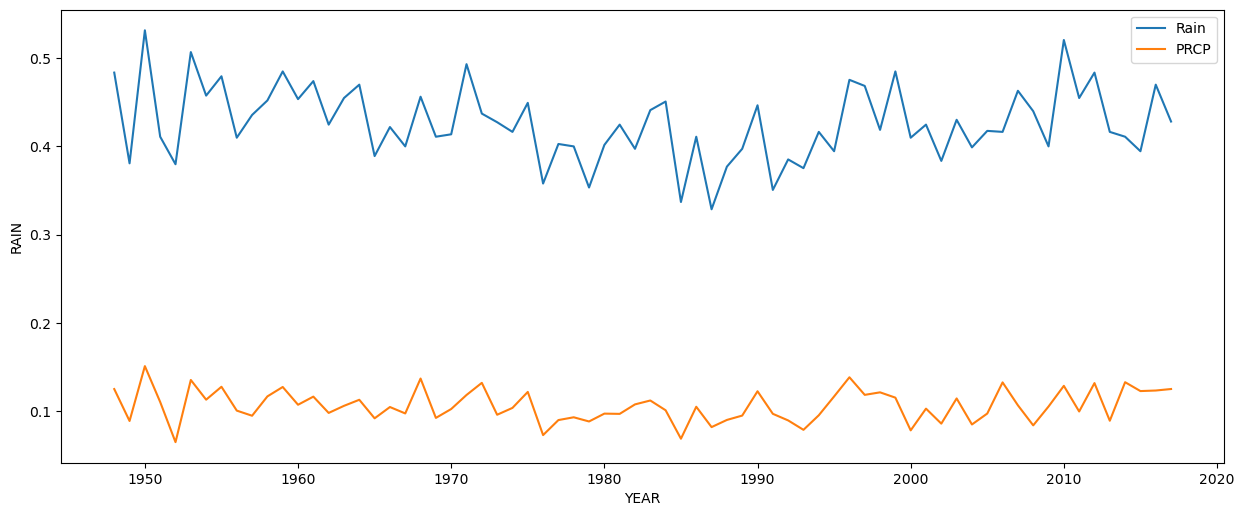

In [363]:
# Year Wise Rain and PRCP:

plt.figure(figsize= (15,6), dpi= 100)

sns.lineplot(data= df.groupby("YEAR").mean()["RAIN"], label= "Rain")
sns.lineplot(data= df.groupby("YEAR").mean()["PRCP"], label= "PRCP")

plt.legend()
plt.show()

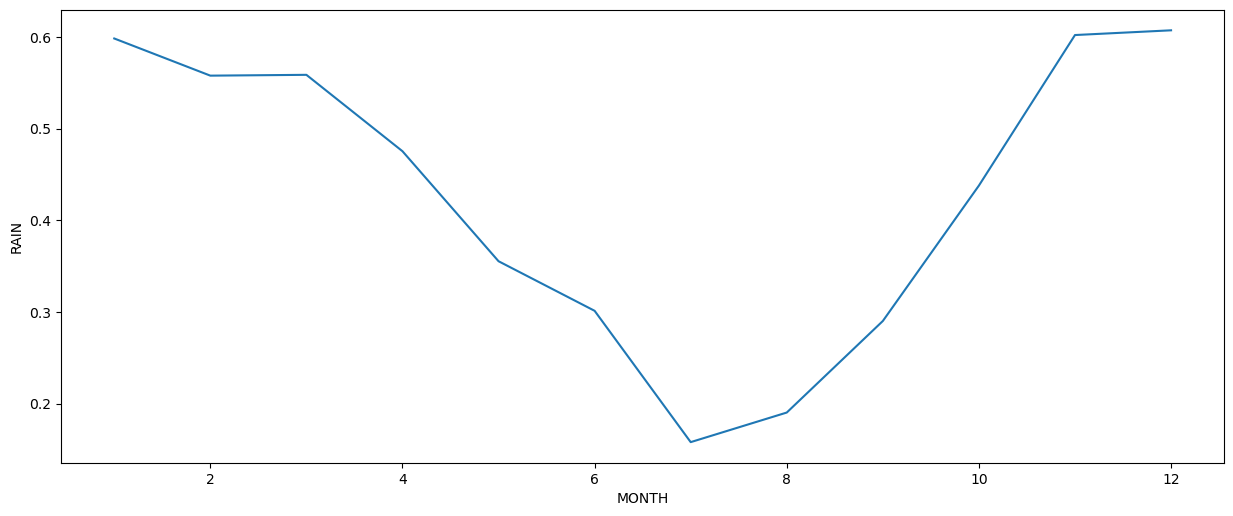

In [364]:
# Month Wise Rain:

plt.figure(figsize= (15,6), dpi= 100)

sns.lineplot(data= df.groupby("MONTH").mean()["RAIN"])

plt.show()

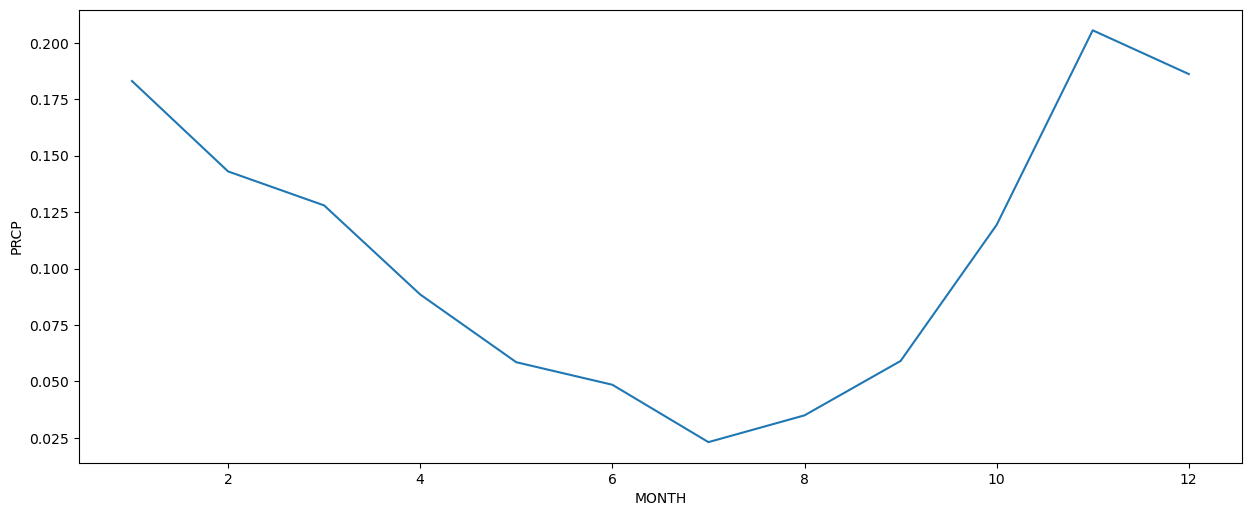

In [365]:
# Month Wise PRCP:

plt.figure(figsize= (15,6), dpi= 100)

sns.lineplot(data= df.groupby("MONTH").mean()["PRCP"])

plt.show()

<Figure size 1500x600 with 0 Axes>

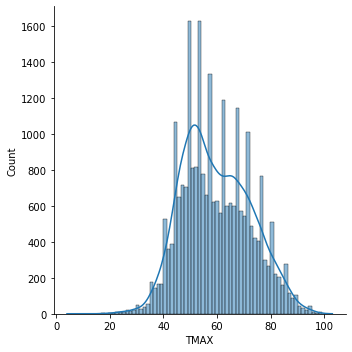

In [366]:
# Distribution of "TMAX":

plt.figure(figsize= (15,6), dpi= 100)

sns.displot(data= df, x= "TMAX", kde= True)

plt.show()

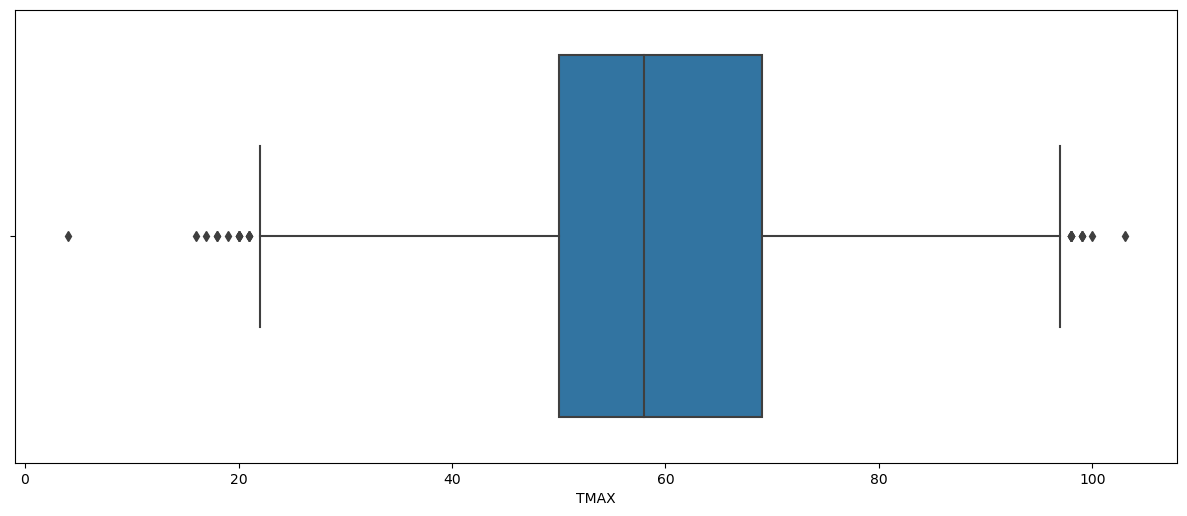

In [367]:
plt.figure(figsize= (15,6), dpi= 100)

sns.boxplot(data= df, x= "TMAX")

plt.show()

In [368]:
# There seems to be some Outliers:

df[(df["TMAX"]< 22) | (df["TMAX"]> 97)]

,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
743,1.27,19,11,1,1950,1,13
744,0.16,16,8,1,1950,1,14
745,0.02,21,15,1,1950,1,15
761,0.00,20,0,0,1950,1,31
1419,0.08,4,39,1,1951,11,20
2872,0.00,21,13,0,1955,11,12
4603,0.00,98,66,0,1960,8,8
4604,0.00,99,59,0,1960,8,9
6194,0.00,20,10,0,1964,12,16
7167,0.00,98,59,0,1967,8,16


In [369]:
# Removing These Rows:

df = df.drop(df[(df["TMAX"]< 22) | (df["TMAX"]> 97)].index, axis= 0)

In [370]:
df.shape

(25524, 7)

<Figure size 1500x600 with 0 Axes>

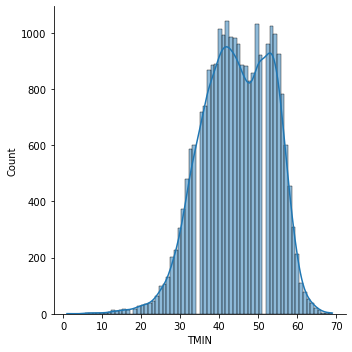

In [371]:
# Distribution of "TMIN":

plt.figure(figsize= (15,6), dpi= 100)

sns.displot(data= df, x= "TMIN", kde= True)

plt.show()

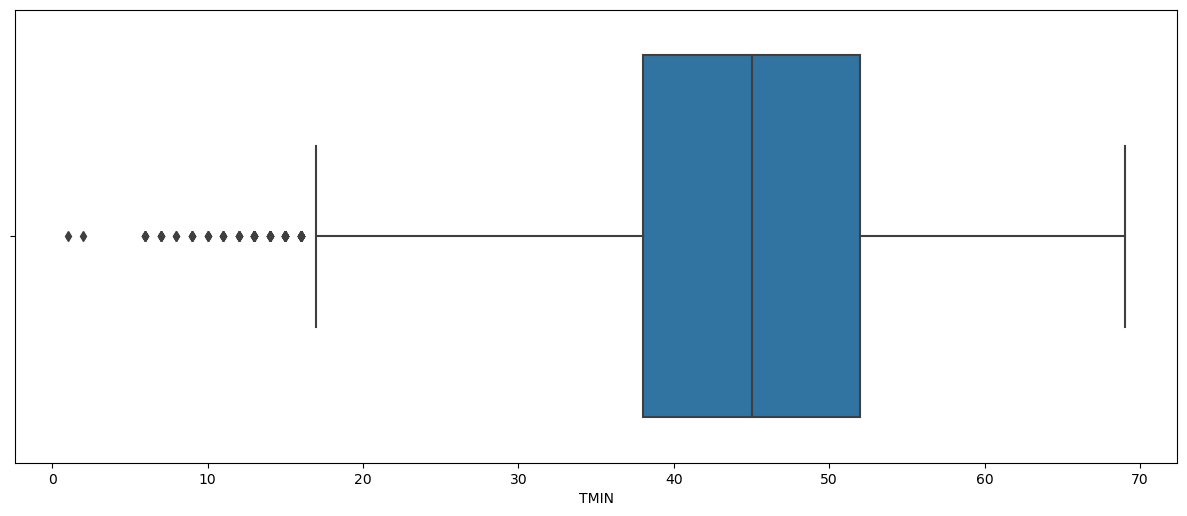

In [372]:
plt.figure(figsize= (15,6), dpi= 100)

sns.boxplot(data= df, x= "TMIN")

plt.show()

In [373]:
# There seems to be some Outliers:

df[(df["TMIN"]< 17)]

,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
358,0.00,36,16,0,1948,12,24
374,0.00,32,13,0,1949,1,9
375,0.00,30,12,0,1949,1,10
388,0.00,30,16,0,1949,1,23
393,0.00,41,16,0,1949,1,28
...,...,...,...,...,...,...,...
18618,0.00,29,16,0,1998,12,22
22269,0.16,26,14,1,2008,12,20
22624,0.00,36,16,0,2009,12,10
22972,0.00,25,16,0,2010,11,23


In [374]:
# Removing These Rows:

df = df.drop(df[(df["TMIN"]< 17)].index, axis= 0)

In [375]:
df.shape

(25444, 7)

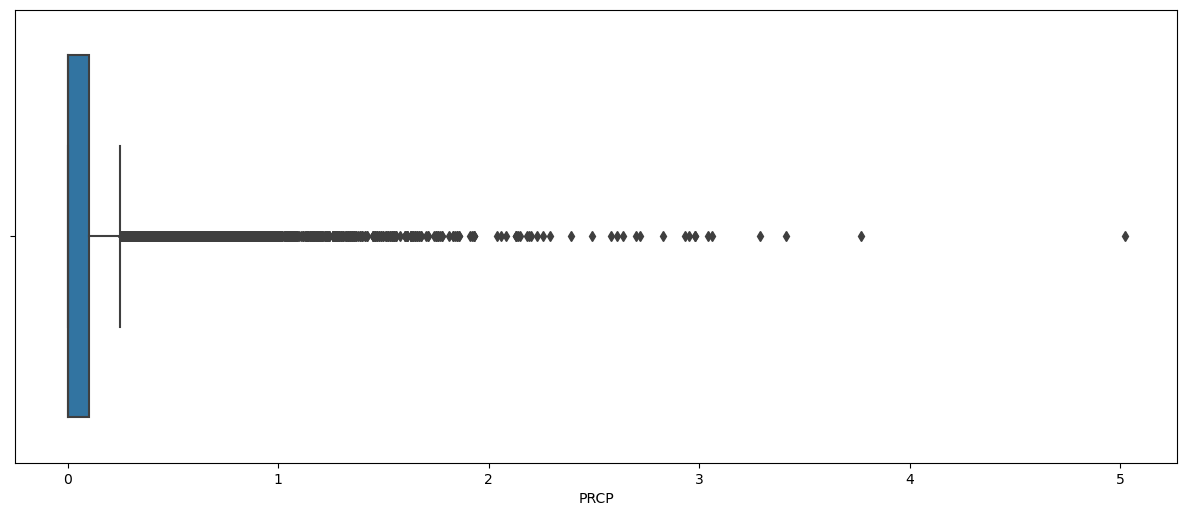

In [378]:
# Distribution of "PRCP":

plt.figure(figsize= (15,6), dpi= 100)

sns.boxplot(data= df, x= "PRCP")

plt.show()

In [381]:
# There seems to be some Outliers:

df[(df["PRCP"] > 1)]

,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
80,2.04,46,37,1,1948,3,21
269,1.51,49,44,1,1948,9,26
412,1.83,48,41,1,1949,2,16
665,1.17,57,48,1,1949,10,27
681,1.38,50,44,1,1949,11,12
...,...,...,...,...,...,...,...
25368,1.05,61,53,1,2017,6,15
25493,1.35,64,47,1,2017,10,18
25494,1.04,54,50,1,2017,10,19
25496,1.61,58,45,1,2017,10,21


In [382]:
# Removing These Rows:

df = df.drop(df[(df["PRCP"] > 1)].index, axis= 0)

In [383]:
df.shape

(25096, 7)

### Train Test Split:

In [384]:
# Features:

x= df.drop("RAIN", axis= 1)

In [385]:
x.head()

,PRCP,TMAX,TMIN,YEAR,MONTH,DAY
0,0.47,51,42,1948,1,1
1,0.59,45,36,1948,1,2
2,0.42,45,35,1948,1,3
3,0.31,45,34,1948,1,4
4,0.17,45,32,1948,1,5


In [386]:
# Target:

y = df["RAIN"]

In [387]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RAIN, dtype: int64

In [388]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [389]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20076, 6)
(5020, 6)
(20076,)
(5020,)


### Scalling:

In [390]:
sc= StandardScaler()

In [392]:
temp = sc.fit_transform(x_train)
x_train = pd.DataFrame(temp, columns= x_train.columns)
x_train.head()

,PRCP,TMAX,TMIN,YEAR,MONTH,DAY
0,-0.507565,0.413161,0.501814,0.023604,0.727590,-0.762601
1,-0.507565,-1.165309,-1.223277,-0.125228,-1.027121,-0.081032
2,-0.160056,-1.717773,-1.108271,0.073215,1.604945,-0.081032
3,-0.507565,0.965625,0.961838,0.321270,0.435138,0.714133
4,-0.449647,0.097467,-0.763253,-0.026006,-0.734669,-0.649006


In [394]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, columns= x_test.columns)
x_test.head()

,PRCP,TMAX,TMIN,YEAR,MONTH,DAY
0,1.924992,-1.481003,-1.223277,-1.117446,-1.027121,-0.876196
1,-0.507565,-0.376074,-0.418235,1.363099,-1.027121,-1.444171
2,-0.507565,1.123472,1.421862,-0.174839,0.142686,-1.330576
3,0.419124,-1.086385,-0.878259,0.618935,-1.027121,-1.330576
4,0.998304,0.334238,1.191850,-1.018224,0.435138,-1.103386


### Logistic Regression Using Grid Search CV:

In [395]:
log_model = LogisticRegression(solver= "saga", max_iter= 100000)

In [400]:
grid_model = GridSearchCV(estimator= log_model,
                         param_grid= {"penalty" : ["l1", "l2"], "C" : np.logspace(0, 5, 10)}, cv= 5)

In [401]:
# This will take a lot of time to run as Data Size is Large.
grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [402]:
grid_model.best_estimator_

LogisticRegression(max_iter=100000, penalty='l1', solver='saga')

In [403]:
grid_model.best_score_

1.0

In [404]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.070998,0.035803,0.001790,0.000397,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
1,0.178123,0.001017,0.001795,0.000399,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.970867,0.969116,0.966625,0.970361,0.970112,0.969416,0.001507,20
2,4.265616,0.064202,0.001984,0.000013,3.593814,l1,"{'C': 3.5938136638046276, 'penalty': 'l1'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
3,0.430871,0.002606,0.001783,0.000393,3.593814,l2,"{'C': 3.5938136638046276, 'penalty': 'l2'}",0.991285,0.989290,0.988792,0.989041,0.988792,0.989440,0.000941,19
4,4.882560,0.066362,0.001590,0.000483,12.915497,l1,"{'C': 12.91549665014884, 'penalty': 'l1'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
5,0.877265,0.008194,0.001391,0.000482,12.915497,l2,"{'C': 12.91549665014884, 'penalty': 'l2'}",1.000000,0.999751,0.999751,0.999751,1.000000,0.999851,0.000122,18
6,5.095199,0.056532,0.001777,0.000390,46.415888,l1,"{'C': 46.4158883361278, 'penalty': 'l1'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
7,1.594364,0.014803,0.001385,0.000476,46.415888,l2,"{'C': 46.4158883361278, 'penalty': 'l2'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
8,5.204704,0.075885,0.001581,0.000474,166.810054,l1,"{'C': 166.81005372000593, 'penalty': 'l1'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
9,2.691231,0.079921,0.001782,0.000392,166.810054,l2,"{'C': 166.81005372000593, 'penalty': 'l2'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1


### Model Evaluation:

In [407]:
pred = grid_model.predict(x_test)

In [408]:
# Accuracy:

accuracy_score(y_test, pred)

1.0

In [409]:
# Precision:

precision_score(y_test, pred)

1.0

In [410]:
# Recall:

recall_score(y_test, pred)

1.0

In [411]:
# Confusion Matrix:

confusion_matrix(y_test, pred)

array([[2894,    0],
       [   0, 2126]], dtype=int64)

In [412]:
# Classification Report:

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2894
           1       1.00      1.00      1.00      2126

    accuracy                           1.00      5020
   macro avg       1.00      1.00      1.00      5020
weighted avg       1.00      1.00      1.00      5020



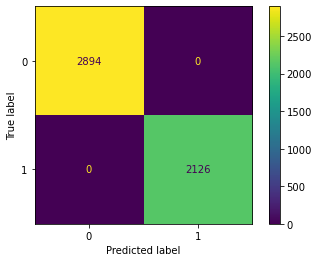

In [413]:
# Plotting Confusion Matrix:

plot_confusion_matrix(grid_model, x_test, y_test)
plt.show()

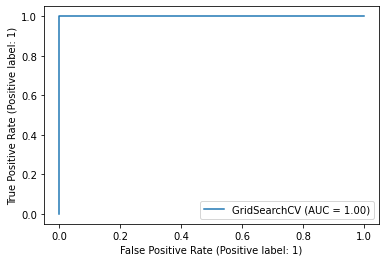

In [414]:
# Plotting ROC Curve:

plot_roc_curve(grid_model, x_test, y_test)
plt.show()

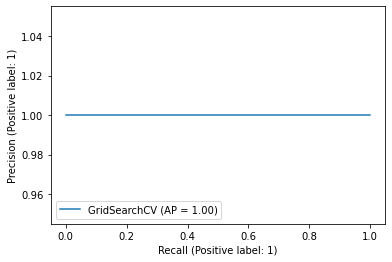

In [415]:
# Plotting Precision Recall Curve:

plot_precision_recall_curve(grid_model, x_test, y_test)
plt.show()